In [6]:
using LinearAlgebra
# using IntegerSmithNormalForm
using CSV
# using DataFrames

In [38]:
function elementary(mu::Int, nu::Int)
    E = zeros(Int32, 4,4)
    E[mu,nu] = 1
    return E
end

elementary (generic function with 1 method)

In [39]:
function fluxes(a::Matrix)
    # input: in the form a[sl_from][direction]
    # Returns 16 plaquette valued things, notation
    # output phi[sl_from][direction]
    out = zeros(4,4)
    for (mu, (i1,i2,i3)) in enumerate(Iterators.Stateful([
                    (4,2,3), (2,4,1), (3,1,4), (1,3,2) ]))
        out[mu, 4] = a[i1, 3] - a[i2, 1] + a[i2, 2] - a[i3, 3] + a[i3, 1] - a[i1, 2]
    end

    for (mu, (i1,i2,i3)) in enumerate(Iterators.Stateful([
                    (1,3,2), (3,1,4), (2,4,1), (4,2,3) ]))
        out[mu, 1] = a[i1, 2] - a[i2, 4] + a[i2, 3] - a[i3, 2] + a[i3, 4] - a[i1, 3]
    end

    for (mu, (i1,i2,i3)) in enumerate(Iterators.Stateful([
                    (1,2,4), (3,4,2), (2,1,3), (4,3,1) ]))
        out[mu, 2] = a[i1, 3] - a[i2, 4] + a[i2, 1] - a[i3, 3] + a[i3, 4] - a[i1, 1]
    end

    for (mu, (i1,i2,i3)) in enumerate(Iterators.Stateful([
                    (1,4,3), (3,2,1), (2,3,4), (4,1,2) ]))
        out[mu, 3] = a[i1, 1] - a[i2, 4] + a[i2, 2] - a[i3, 1] + a[i3, 4] - a[i1, 2]
    end

    return out
end
    
    

fluxes (generic function with 1 method)

In [40]:
# the pi/2 ansatz
e = 0.1
a_πflux = [
    0 0 π -π; # sl 1
    0 0 0 0; # sl 2
    0 0 π π; # sl 3
    0 0 0 0  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_πflux) ))/π  

4×4 Matrix{Float64}:
 -1.0   1.0   1.0  -1.0
  1.0   1.0  -1.0  -1.0
 -1.0   1.0  -1.0   1.0
  1.0  -1.0   1.0   1.0

In [41]:
# the pi/2 ansatz
e = 0.1
a_π2flux = [
    0 0 π/2 -π/2; # sl 1
    0 π 0 0; # sl 2
    0 0 π/2 π/2; # sl 3
    0 0 0 0  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_π2flux) ))/π  

4×4 Matrix{Float64}:
 0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5

In [9]:
a_ππ00_12 = [
    0 0 0 π; # sl 1
    0 0 0 π; # sl 2
    0 0 0 0; # sl 3
    0 0 0 0  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_ππ00_12) ))/π  

4×4 Matrix{Float64}:
  1.0  -1.0  0.0  0.0
 -1.0   1.0  0.0  0.0
  1.0  -1.0  0.0  0.0
 -1.0   1.0  0.0  0.0

In [42]:
a_ππ00_13 = [
    0 0 0 π; # sl 1
    0 0 0 0; # sl 2
    0 0 0 π; # sl 3
    0 0 0 0  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_ππ00_13) ))/π  

4×4 Matrix{Float64}:
 -1.0  0.0   1.0  0.0
 -1.0  0.0   1.0  0.0
  1.0  0.0  -1.0  0.0
  1.0  0.0  -1.0  0.0

In [8]:
a_ππ00_14 = [
    0 0 0 π; # sl 1
    0 0 0 0; # sl 2
    0 0 0 0; # sl 3
    0 0 0 π  # sl 4 (0)
]

angle.(exp.(1im*fluxes(a_ππ00_14) ))/π  

4×4 Matrix{Float64}:
 0.0   1.0  -1.0  0.0
 0.0  -1.0   1.0  0.0
 0.0  -1.0   1.0  0.0
 0.0   1.0  -1.0  0.0

In [43]:
fluxpat(a) = angle.(exp.(1im*fluxes(a)))
e = 0.1

fluxpat([
    0 0 e 2π-e; # sl 1
    0 0 -e 0; # sl 2
    0 0 0 0; # sl 3
    0 0 0 2π-e  # sl 4 (0)
])

4×4 Matrix{Float64}:
 -0.1  -2.44929e-16   0.1   0.0
  0.1   0.2          -0.1  -0.2
  0.1   2.44929e-16  -0.1   0.0
 -0.1  -0.2           0.1   0.2

In [12]:
from_numerics = CSV.read("gaugefiles/0_flux%003.gauge", 
    DataFrame,delim=' ',ignorerepeated=true)

fluxpat(collect(transpose(reshape(from_numerics[!,5],4,4))))

4×4 Matrix{Float64}:
 -8.70397e-8   4.66234e-7  -2.7783e-7   -1.01364e-7
  1.11714e-7   3.6623e-8    2.53155e-7  -4.01493e-7
  5.8312e-7   -9.62314e-7   6.72535e-7  -2.93341e-7
 -6.07794e-7   4.59457e-7  -6.47861e-7   7.96198e-7

In [44]:
M = zeros(Int32, 16,16);
for mu=1:4
    for nu=1:4
        # mu -> row; = 
        M[:, nu + 4*(mu-1)] = vec(fluxes(elementary(mu, nu)))
    end
end

M

16×16 Matrix{Int32}:
  0   1  -1   0   0  -1   0   1   0   0   1  -1   0   0   0   0
  0   0   1  -1   0   0   0   0   0   1  -1   0   0  -1   0   1
  0  -1   0   1   0   1  -1   0   0   0   0   0   0   0   1  -1
  0   0   0   0   0   0   1  -1   0  -1   0   1   0   1  -1   0
 -1   0   1   0   1   0   0  -1   0   0   0   0   0   0  -1   1
  0   0   0   0   0   0  -1   1  -1   0   1   0   1   0   0  -1
  1   0   0  -1  -1   0   1   0   0   0  -1   1   0   0   0   0
  0   0  -1   1   0   0   0   0   1   0   0  -1  -1   0   1   0
  1  -1   0   0   0   0   0   0  -1   0   0   1   0   1   0  -1
 -1   0   0   1   0   1   0  -1   1  -1   0   0   0   0   0   0
  0   0   0   0   1  -1   0   0   0   1   0  -1  -1   0   0   1
  0   1   0  -1  -1   0   0   1   0   0   0   0   1  -1   0   0
  0   0   0   0  -1   1   0   0   1   0  -1   0   0  -1   1   0
  1   0  -1   0   0  -1   1   0   0   0   0   0  -1   1   0   0
 -1   1   0   0   0   0   0   0   0  -1   1   0   1   0  -1   0
  0  -1   1   0   1

In [45]:
rank(M)

6

In [184]:
R,S,B = snf(M)

(Int32[0 0 … 0 0; 0 0 … 0 0; … ; 1 1 … 1 0; -1 -1 … 0 1], Int32[1 0 … 0 0; 0 1 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Int32[1 0 … -1 -1; 0 1 … 0 -1; … ; 0 0 … 1 0; 0 0 … 0 1])

In [46]:
function uniform( phi )
    # returns the matrix of uniform-flux states
    # phi in the form [phi1, phi2, phi3]
    F = zeros(Int32, 4,4)
    for mu =1:4
        F[mu, :] .= phi'
    end
    return vec(F)
end

uniform (generic function with 1 method)

In [47]:
Phi = mapreduce(permutedims, vcat, [
    uniform([1 1 -1 -1]),
    uniform([1 -1 1 -1]),
    uniform([1 -1 -1 1])
    ])

3×16 Matrix{Int32}:
 1  1  1  1   1   1   1   1  -1  -1  -1  -1  -1  -1  -1  -1
 1  1  1  1  -1  -1  -1  -1   1   1   1   1  -1  -1  -1  -1
 1  1  1  1  -1  -1  -1  -1  -1  -1  -1  -1   1   1   1   1

In [295]:
@assert S*S == S
X= (S*R*Phi')[:,2] + (S*R*Phi')[:,1];
a_test = B*X
fluxes(reshape(a_test,4,4))

4×4 Matrix{Float64}:
  2.0   0.0   0.0  -2.0
  0.0  -2.0  -2.0   4.0
 -8.0   6.0  -2.0   4.0
  6.0  -4.0   4.0  -6.0

In [299]:
R

16×16 Matrix{Int32}:
  0   0   0  0  -1   0  0  0   0  0  0  0  0  0  0  0
  0   0  -1  0   0   0  0  0   0  0  0  0  0  0  0  0
  0   1   0  0   0   0  0  0   0  0  0  0  0  0  0  0
  0  -1  -1  0   1   0  0  0   1  0  0  0  0  0  0  0
 -1  -1  -1  0   0   0  0  0   0  0  0  0  0  0  0  0
  1   1   1  0   0  -1  0  0   0  0  0  0  0  0  0  0
  1   0   1  0   1   0  1  0   0  0  0  0  0  0  0  0
 -1   0  -1  0   0   1  0  1   0  0  0  0  0  0  0  0
  1   1   1  1   0   0  0  0   0  0  0  0  0  0  0  0
  1   1   0  0   0   0  0  0   1  1  0  0  0  0  0  0
 -2  -1  -1  0  -1   1  0  0  -1  0  1  0  0  0  0  0
  1   0   1  0   1  -1  0  0   1  0  0  1  0  0  0  0
  1   0   0  0   1   0  0  0   1  0  0  0  1  0  0  0
 -1   0   0  0   0   1  0  0  -1  0  0  0  0  1  0  0
  1   1   1  0   0  -1  0  0   1  0  0  0  0  0  1  0
 -1  -1  -1  0  -1   0  0  0  -1  0  0  0  0  0  0  1

# Reverse engineering the fluxes

Problem: within finite unit cell, can only have fluxes be integer multiple of $\frac{\pi}{2}L^2$. Not obvious how to fine J, B such that fluxes agree.


In [48]:
using Optim

function best_flux_fast(gvec::Vector{Float64})
    best_fun = sum(abs.(gvec))+1
    res = Nothing

    
    function energy_der!(storage, x)
        storage[1] = -gvec[1]*sin(x[1]) + gvec[4]*sin(-x[1]-x[2]-x[3])
        storage[2] = -gvec[2]*sin(x[2]) + gvec[4]*sin(-x[1]-x[2]-x[3])
        storage[3] = -gvec[3]*sin(x[3]) + gvec[4]*sin(-x[1]-x[2]-x[3])
    end

    
    energy_cost(x) = dot(gvec[1:3],cos.(x[1:3])) + gvec[4]*cos(-x[1]-x[2]-x[3])

    guesses = [
        [0. 0. 0.],
        [π/2 π/2 π/2],
        [π/2 -π/2 π/2],
        [-π/2 -π/2 π/2],
        [-π/2 -π/2 -π/2],
        [π π π]
        ]

    lower = [-π -π -π]
    upper = [π π π]
    
    minim = Inf
    r = nothing
    for guess in guesses
        od = OnceDifferentiable(energy_cost, energy_der!, guess)
        res = optimize(od, lower, upper, guess, Fminbox(GradientDescent()) )
        if res.minimum < minim
            r = res
            minim = res.minimum
        end
    end
    return r
end

best_flux_fast (generic function with 1 method)

In [58]:
?reduce

search: reduce reducec mapreduce mapreducec



```
reduce(op, itr; [init])
```

Reduce the given collection `itr` with the given binary operator `op`. If provided, the initial value `init` must be a neutral element for `op` that will be returned for empty collections. It is unspecified whether `init` is used for non-empty collections.

For empty collections, providing `init` will be necessary, except for some special cases (e.g. when `op` is one of `+`, `*`, `max`, `min`, `&`, `|`) when Julia can determine the neutral element of `op`.

Reductions for certain commonly-used operators may have special implementations, and should be used instead: [`maximum`](@ref)`(itr)`, [`minimum`](@ref)`(itr)`, [`sum`](@ref)`(itr)`, [`prod`](@ref)`(itr)`, [`any`](@ref)`(itr)`, [`all`](@ref)`(itr)`. There are efficient methods for concatenating certain arrays of arrays by calling `reduce(`[`vcat`](@ref)`, arr)` or `reduce(`[`hcat`](@ref)`, arr)`.

The associativity of the reduction is implementation dependent. This means that you can't use non-associative operations like `-` because it is undefined whether `reduce(-,[1,2,3])` should be evaluated as `(1-2)-3` or `1-(2-3)`. Use [`foldl`](@ref) or [`foldr`](@ref) instead for guaranteed left or right associativity.

Some operations accumulate error. Parallelism will be easier if the reduction can be executed in groups. Future versions of Julia might change the algorithm. Note that the elements are not reordered if you use an ordered collection.

# Examples

```jldoctest
julia> reduce(*, [2; 3; 4])
24

julia> reduce(*, [2; 3; 4]; init=-1)
-24
```

---

```
reduce(f, A::AbstractArray; dims=:, [init])
```

Reduce 2-argument function `f` along dimensions of `A`. `dims` is a vector specifying the dimensions to reduce, and the keyword argument `init` is the initial value to use in the reductions. For `+`, `*`, `max` and `min` the `init` argument is optional.

The associativity of the reduction is implementation-dependent; if you need a particular associativity, e.g. left-to-right, you should write your own loop or consider using [`foldl`](@ref) or [`foldr`](@ref). See documentation for [`reduce`](@ref).

# Examples

```jldoctest
julia> a = reshape(Vector(1:16), (4,4))
4×4 Matrix{Int64}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

julia> reduce(max, a, dims=2)
4×1 Matrix{Int64}:
 13
 14
 15
 16

julia> reduce(max, a, dims=1)
1×4 Matrix{Int64}:
 4  8  12  16
```


In [119]:
res = best_flux_fast([1.,1,1,-1])
println(res.minimum)
println(res.minimizer/π, "π")
+cos(π) + cos(π) + cos(π) - cos(π)

-2.82842712474619
[0.7499999997106135 0.7499999997106135 0.7499999997106135]π


-2.0

In [84]:
g0 = range(0.001,2,100)

flux_vals = reduce(vcat, map(g->best_flux_fast([1,1,1,-g]).minimizer, g0))

100×3 Matrix{Float64}:
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159  -3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 3.14159   3.14159  3.14159
 ⋮                  
 2.24592   2.24592  2.24592
 2.2443    2.2443   2.2443
 2.24272   2.24272  2.24272
 2.24117   2.24117  2.24117
 2.23965   2.23965  2.23965
 2.23816   2.23816  2.23816
 2.23671   2.23671  2.23671
 2.23528   2.23528  2.23528
 2.23388   2.23388  2.23388
 2.23251   2.23251  2.23251
 2.23117   2.23117  2.23117
 2.22985   2.22985  2.22985

In [103]:

function zeroth_flux(g0)
    # x = g0/gj
    try 
        return 3π/2 - 1.5*acos(0.5 - 0.5/g0) 
    catch 
        return 0
    end
end



function g0_over_g1(Φ0)
    res = ( 1 - 2*cos((3π/2 - Φ0)*2/3) )^-1
    if res < 1 
        return NaN
    else
        return res
    end
end

g0_over_g1 (generic function with 1 method)

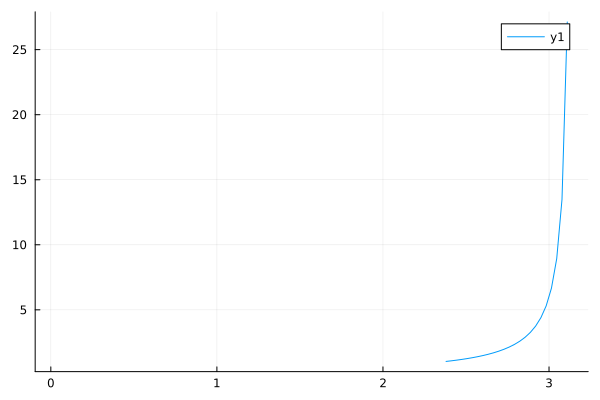

In [106]:
Φ_vals = collect(range(0,π,100))
plot(Φ_vals,g0_over_g1.(Φ_vals))

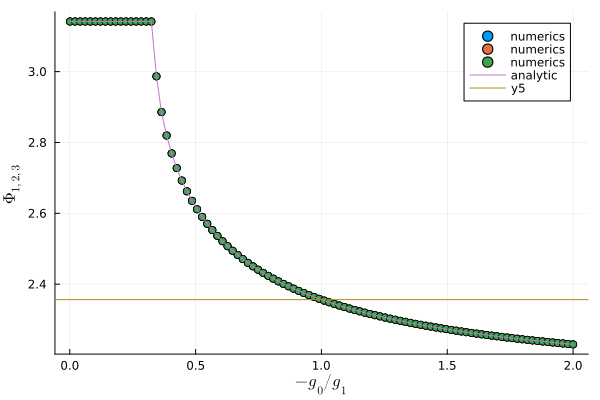

In [109]:
using LaTeXStrings
using Plots


plot(g0, abs.(flux_vals),label="numerics",seriestype=:scatter)



plot!(g0, π .- 1/3 .*zeroth_flux.(g0),label="analytic")


hline!([3π/4])
xlabel!(L"-g_0/g_1")
ylabel!(L"\Phi_{1,2,3}")



We simply want to get this for a representative case. A simple one is $\Phi = (7π/8, 3π/8,3π/8,3π/8)$ 
Can get the first analytically - in the 111 axis,
$$
\Phi_0 = \frac{3\pi}{2} - \frac{3}{2} \operatorname{arccos}\left[ \frac{1}{2} + \frac{g_1}{2g_0} \right] 
$$
Realises the first case for $g_1/g_0 = 1-\sqrt{3}$.

Second case: $(1, 1/\sqrt{2}, 1,-1)$

2.5320888862379567

36

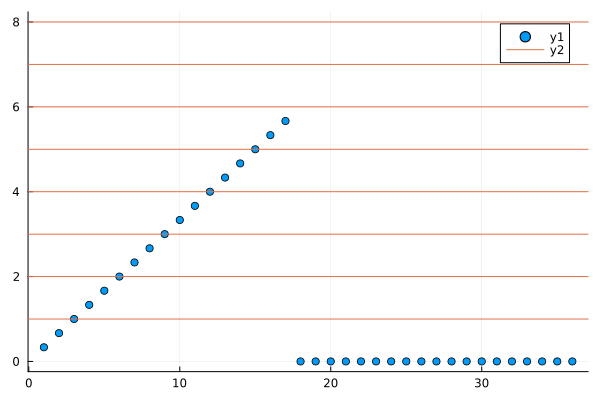

In [190]:
L = 3
Φelem = 2*π / (4 * L^2)

print((4 * L^2))

calc_fl = N -> abs( best_flux_fast([-1, -1, -1, finv( N *Φelem)]).minimizer[1] / Φelem )
plot(1:36, calc_fl.(collect(1:36)), seriestype=:scatter)
hline!(1:8)

In [169]:

best_flux_fast([-1, -1, -1, finv( 12 *Φelem)]).minimizer/π

1×3 Matrix{Float64}:
 -0.222222  -0.222222  -0.222222

In [197]:
using LinearAlgebra
include("PyrochloreGeometry.jl")
import .PyrochloreGeometry as geom


In [198]:
function g_from_params(Jpm,B)
    return [3/2 *Jpm^3 + 5/4 * Jpm^2  * (B' * geom.pyro[mu]/√3)^2 for mu=1:4]
end

g_from_params (generic function with 1 method)

In [202]:
g_from_params(-0.015, [1,1,1].*0.2/√3)

4-element Vector{Float64}:
  6.187500000000001e-6
 -3.812499999999999e-6
 -3.812499999999999e-6
 -3.812499999999999e-6

A given g-state is uniquely specified by the ratio

$$ J_{\pm}/B^2 := a $$

In the 111 direction, $a = 5\frac{x/9 - 1}{1-x}$, where $x = g_0/g_1$.


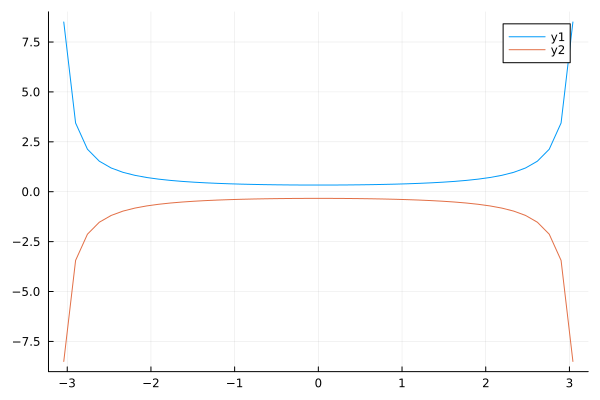

In [423]:
x = Φ0 -> ( 1 - 2*cos((3π/2 - Φ0)*2/3) )^-1;
x2 = Φ0 -> (1-4*cos(Φ0/3)^2)^-1
phi = range(-π+0.1,π-0.1,44)

plot()
plot!(phi, x.(phi))
plot!(phi, x2.(phi))
# ylims!(-20,20)

In [430]:
"""
FF_111_B(desired_Φ, Jpm)
-> B

x = g0/g1 <0


Returns the (111) field needed to realise the prescribed field
"""
function FF_111_B(desired_Φ0, Jpm)
    # x = Φ0 -> ( 1 - 2*cos((π/2 - Φ0)*2/3) )^-1;
    
    xp = (1-4*cos(desired_Φ0/3)^2)^-1
    # a = xp->  5*(xp/9 -1) / ;
    B = sqrt(Jpm* 6*(1-xp)/ (xp*5/9 - 5) )
    return B
end

    

FF_111_B

In [457]:
Jpm = -0.15
Φ0 = π - 3π/36
B = FF_111_B(Φ0, Jpm)
g = g_from_params(Jpm, B*[1,1,1]/√3)
println(g)
println([Φ0./π, -Φ0./3π])
best_flux_fast( g).minimizer

[0.01053689398167694, -0.003329234002035896, -0.003329234002035896, -0.003329234002035896]
[0.9166666666666666, -0.3055555555555555]


1×3 Matrix{Float64}:
 2.87979  -0.95993  -0.95993

In [450]:
# Correctness check
for n in 1:100
    Jpm = -rand()
    Φ0 = π*( 1 - 0.3*rand() )
    B = FF_111_B(Φ0, Jpm)
    g = g_from_params(Jpm, B*[1,1,1]/√3)
    phi = abs.(best_flux_fast(g).minimizer)
    if abs(phi[1]-Φ0) > 1e-3
        println( "$(Jpm)\t $(Φ0)\t$(phi[1])\t$(abs(phi[1]-Φ0))" )
    end
end

# more or less works

-0.01928448546004269	 2.2959374783133795	3.141592652649826	0.8456551743364464
-0.013748495130968652	 2.4340926120283903	2.432178685387746	0.00191392664064427
-0.8194318337701567	 2.3792540015708954	3.14159265266851	0.7623386510976147
-0.16697140454249293	 2.324680498600713	3.141592652701005	0.8169121541002919
-0.8089440863584048	 2.4015719779306206	3.141592652653696	0.7400206747230755


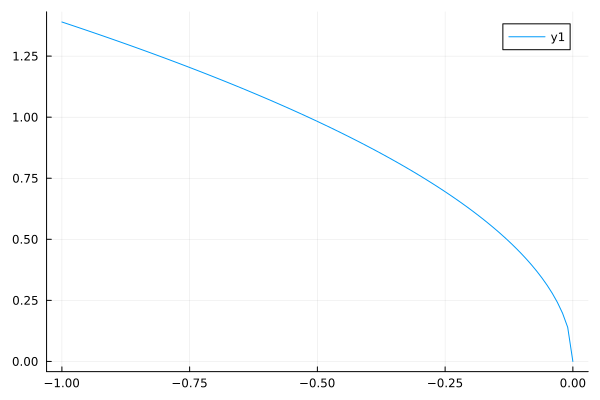

In [451]:
Jpm_vals = range(-1,0,100)

plot(Jpm_vals, FF_111_B.(2π/3, Jpm_vals))

In [379]:
# best_flux_fast(g_from_params(Jpm, 0.53825*[1,1,1]/√3)).minimizer/π
g_from_params(Jpm, 0.53825*[1,1,1]/√3)

4-element Vector{Float64}:
  0.003085679882812502
 -0.0041571466796874994
 -0.0041571466796874994
 -0.0041571466796874994

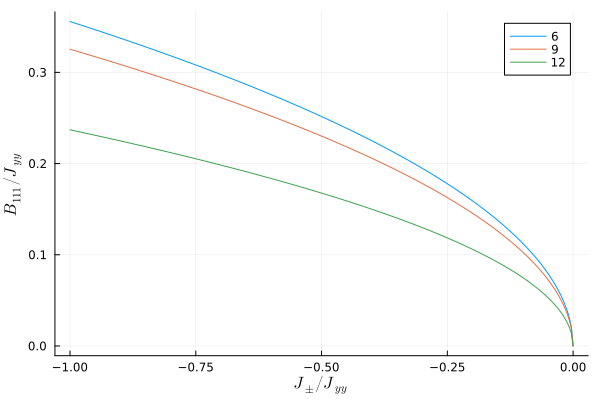

In [235]:
using Plots
using LaTeXStrings
jpp = range(-1,0,300)

plot(jpp, FF_111_B.(6 * Φelem, jpp), label="6")
plot!(jpp, FF_111_B.(9 * Φelem, jpp), label="9")
plot!(jpp, FF_111_B.(12 * Φelem, jpp), label="12")
ylabel!(L"B_{111}/J_{yy}")
xlabel!(L"J_{\pm}/J_{yy}")

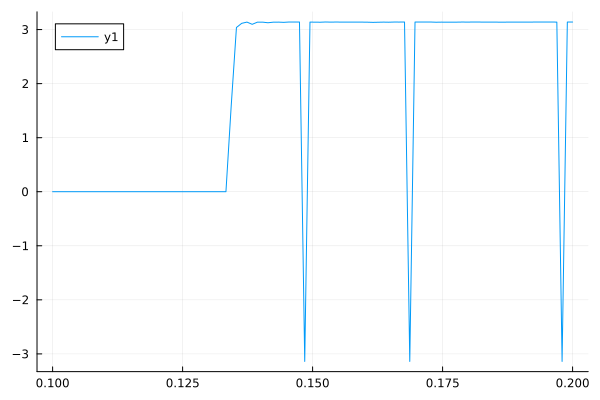

In [489]:
bb = range(0.1,0.2,100)
y = [best_flux_fast(g_from_params(-0.01, b*[1,1,0]/√2)).minimizer[1] for b in bb ]
plot(bb,y)